<a href="https://colab.research.google.com/github/SwenFereira/Hotel-Booking-Analysis-EDA-Capstone-Project-/blob/main/Final_Submission_of_Swen_Fereira_%7C_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

**Things we'll be doing.**

1. Understnding the problem : We'll look at each variable and we can conclude which variable will help us to analyse this dataset.

2. Exploring unique and missing values.

3. Dealing with missing values

4. Plot the graphs and charts to get some insights about the dataset.

In [5]:
#importing important libraries for the EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/drive') #Making Connection with Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Main Projects /EDA Hotel Analysis/ Hotel Bookings.csv') #reading CSV file

In [8]:
df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [10]:
df.describe() #checking the summary statistics 

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df.shape #checking for the shape of dataset

(119390, 32)

We have total of 119390 rows and 32 columns.

In [12]:
df.info() #fetching information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#Looking for and handling NaN/ Null/ Missing Values and Outliers


In [13]:
df.isna().sum().sort_values(ascending = False) #Check if our data contains any missing values in descending order

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

Conclusion : As we can see from above column company,agent,country and children contains missing values.

We can drop 'company' column as it contains too many missing values.

In [14]:
df.drop( axis=1, columns=['company'] ,inplace=True) #dropped company column because it has too many missing values

In Children column we have 4 missing values, so we are filling those missing values with average value of children column and we are type-casting float values to integer value.

In [15]:
df['children'].fillna(round(df['children'].mean()),inplace=True) #replacing all the missing values with the rounded mean value.
df['children']= df['children'].apply(lambda x : int(x)) 

In agent column, we have 16340 missing values, so we are replacing those values with 'unknown'. Also we are typecasting the ID of Agent to integer values.

In [16]:
df['agent'].fillna(0, inplace=True)
df['agent']= df['agent'].apply(lambda x : int(x))
df['agent']= df['agent'].apply(lambda x : 'unknown' if x==0 else x) #replacing all the missing values with 'unknown'.

We are dropping the rows where the sum of adults, children and babies are equal to 0.

In [17]:
df = df.drop(df[(df['adults']+df['children']+df['babies'])==0].index) #dropping the rows where the sum of adult,children and babies is 0.

Checking for outliers in average daily rate (adr) column.

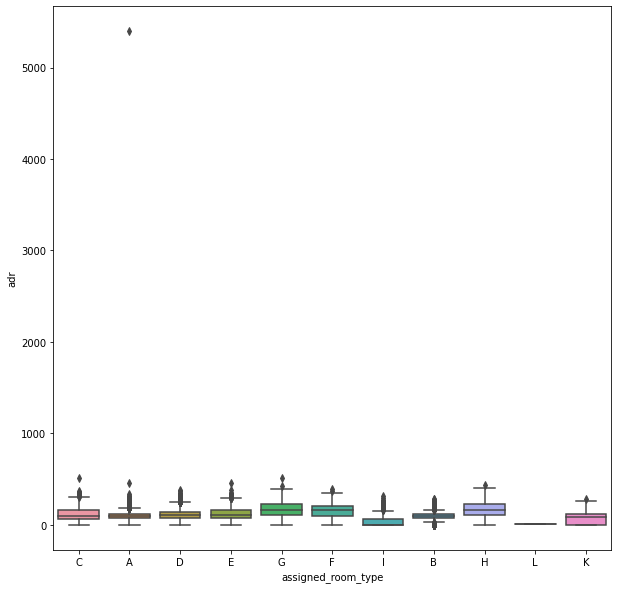

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['adr'],x=df['assigned_room_type'])

Removing outlier data from datset where adr is greater than 1000.

In [19]:
df=df.drop(df[df['adr']>1000].index) #dropping the row where the average daily rate per person is more than 1000.

In [20]:
df=df.drop(df[df['adr']<0].index) #ropping the row where the average daily rate per person is less than 0.

#Things we have done till now is:
1. Checked Head and Tail of the dataset.
2. Analysed summary statistics of the dataset.
3. Looked for NaN/ Null/ Missing Values.
4. Filled missing values.
5. Analysed for Outliers and removed Outliers.

#Now Let's try to find out the solutions for the below question.
1. What is the percentage of booking done in different hotels?
2. How many total bookings done in different Years?
3. How many total bookings done in different months?
4. Total Number of Booking Cancelled in different months?
5. Total Number of Non-Cancelled Bookings in different months?


#1. Plots of type of hotels and their booking

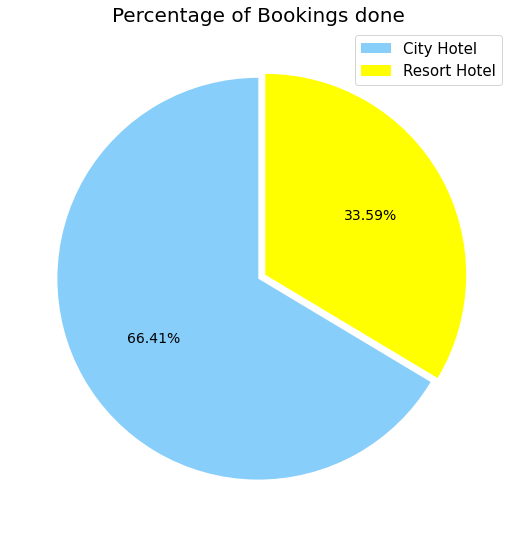

In [21]:
#Pie-Chart for the percentage of bookings done in different types of Hotels.
plt.figure(figsize=(9,10))
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
explode = (0, 0.04)
colors = ['lightskyblue','yellow']
plt.pie(sizes, explode=explode, colors=colors,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of Bookings done', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' : 15})

Conclusion: From the above Pie-Chart, we can conclude that 66.41 % of booking done in City Hotel and 33.59 % of booking done in Resort Hotel. 

#2. Plot Year wise bookings in Hotel

Text(0, 0.5, 'Number of Bookings')

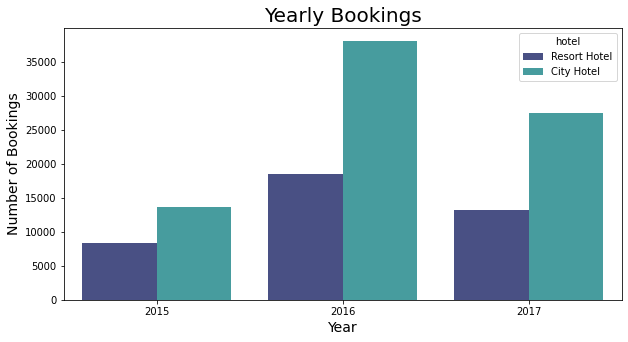

In [22]:
#Countplot for Number of bookings done in 2015, 2016 and 2017 in different type of hotels
plt.figure(figsize=(10,5))
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel', palette='mako').set_title ('Yearly Bookings', fontsize = 20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)

Conclusion : We can see that, In year 2016 most bookings have been made in City Hotel and Resort Hotel.

#3. Plot of Month wise Hotel Booking

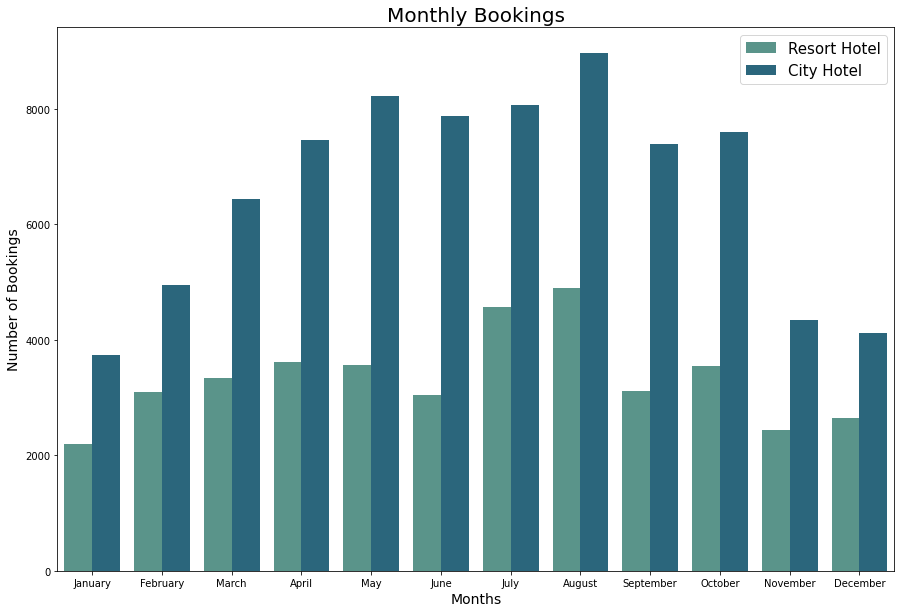

In [23]:
#countplot for total monthly booking in different type of hotels
plt.figure(figsize = (15, 10))
sns.countplot(x=df['arrival_date_month'], hue=df['hotel'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],palette='crest').set_title ('Monthly Bookings',fontsize=20)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.legend(prop={'size':15})

Conclusion: Most of the bookings done in the Month of August in Resort Hotel and City Hotel.

#4. Plot of Monthly cancelled.

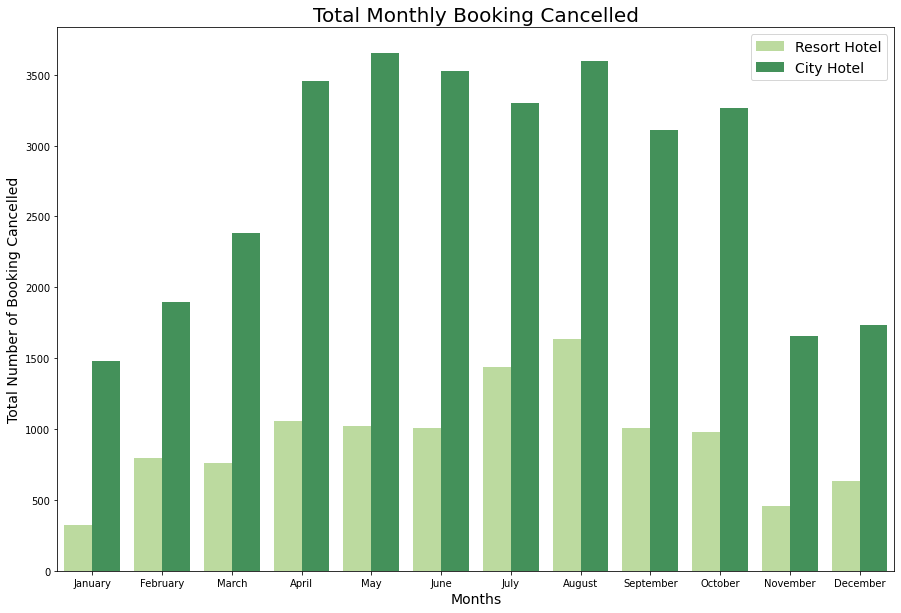

In [24]:
#Countplot of Total number of booking Cancelled month wise 
df1=df[df['is_canceled']==1]
plt.figure(figsize = (15, 10))
sns.countplot(x=df1['arrival_date_month'], hue=df1['hotel'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],palette='YlGn').set_title ('Total Monthly Booking Cancelled',fontsize=20)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Total Number of Booking Cancelled',fontsize=14)
plt.legend(prop={'size':14})

Conclusion : In May, most of the bookings are cancelled in City Hotel and In August most of the cancellation done in Resort Hotel.

#5. Plot of Monthly Actual Booking.

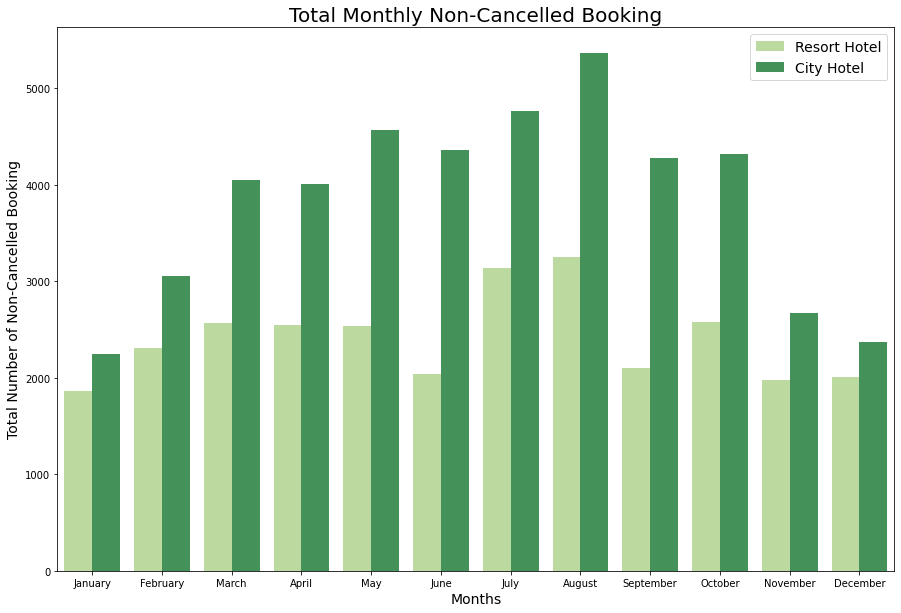

In [25]:
#Countplot for Monthly Non-Cancelled Booking
df2=df[df['is_canceled']==0]
plt.figure(figsize = (15, 10))
sns.countplot(x=df2['arrival_date_month'], hue=df2['hotel'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],palette='YlGn').set_title ('Total Monthly Non-Cancelled Booking',fontsize=20)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Total Number of Non-Cancelled Booking',fontsize=14)
plt.legend(prop={'size':14})

Conclusion: Maximum number of Booking done in August in City Hotel and Resort Hotel that are Not-Cancelled.

6. How many days customers prefer to stay in week night?
7. How many days customers prefer to stay in weekend night?
8. what is the most preferred meal type by customers?
9. How many customers are making pecial Request?
10. Which one is most preferred room type?

#6. Customers stays in weekdays

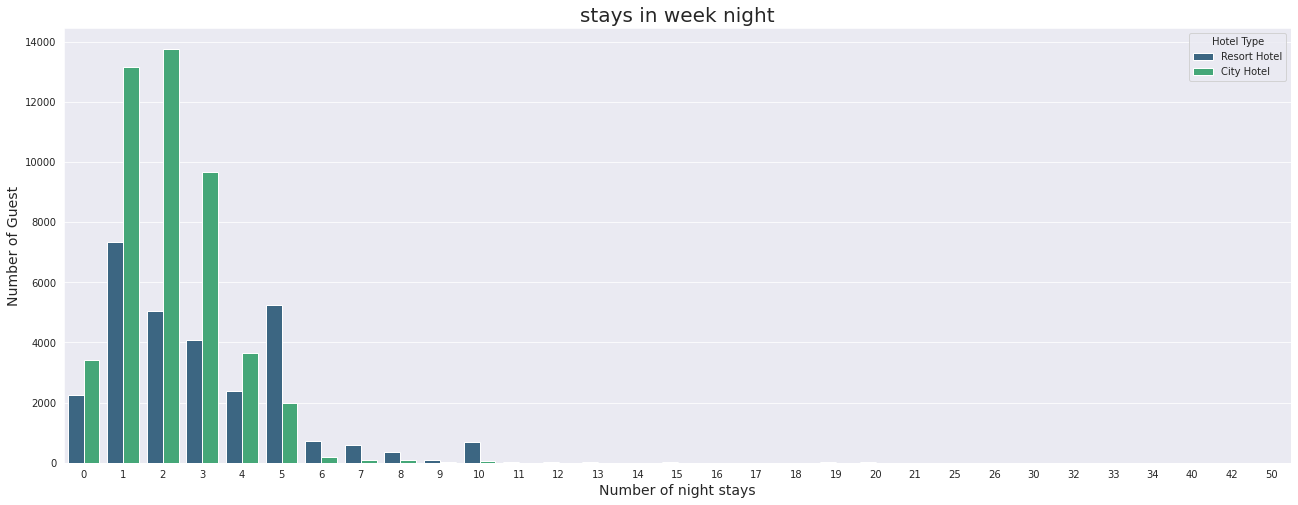

In [26]:
#Countplot of customers that stays in week night
sns.set_style('darkgrid')
plt.figure(figsize=(22,8))
sns.countplot(data = df2, x = 'stays_in_week_nights', hue='hotel', palette="viridis").set_title('stays in week night', fontsize =20)
plt.xlabel("Number of night stays", fontsize=14)
plt.ylabel("Number of Guest", fontsize=14)
plt.legend(title = "Hotel Type",loc = 1)

Conclusion : Most of the customers preferred to stay for 2 days in City Hotel and 1 day in Resort Hotel.

#7.Customers Stays in Weekend

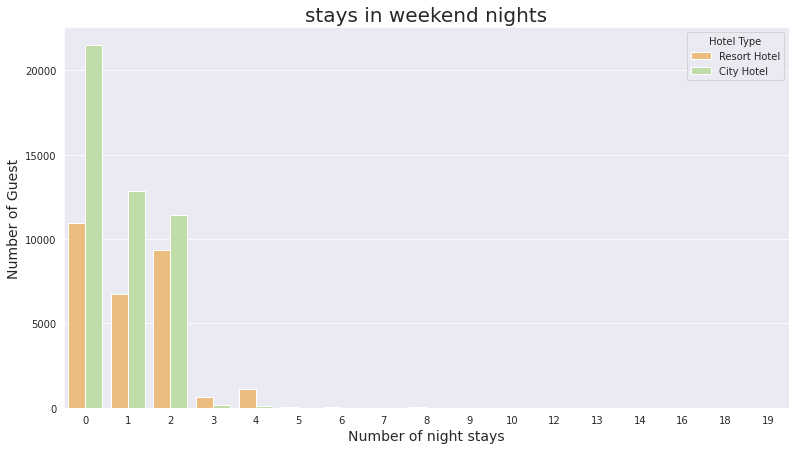

In [27]:
#Countplot for customer stays in weekend
sns.set_style('darkgrid')
plt.figure(figsize=(13,7))
sns.countplot(data = df2, x = 'stays_in_weekend_nights', hue='hotel', palette="Spectral").set_title('stays in weekend nights', fontsize =20)
plt.xlabel("Number of night stays", fontsize=14)
plt.ylabel("Number of Guest", fontsize=14)
plt.legend(title = "Hotel Type",loc = 1)

Conclusion: Most customer stays for 0 nights in Resort and City hotels.

#8. Preferred Meal type

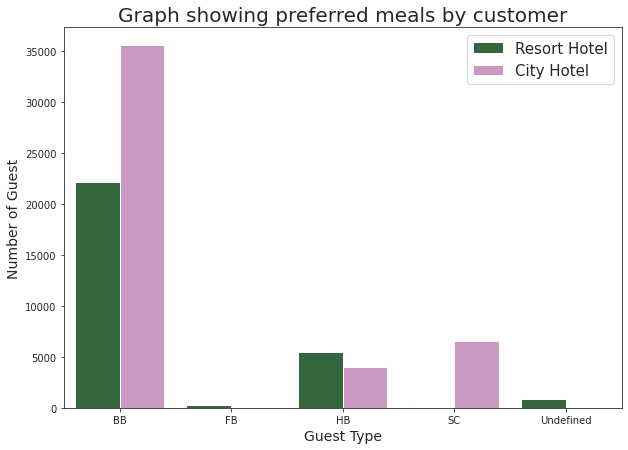

In [28]:
#Countplot for meal type.
sns.set_style('ticks')
plt.figure(figsize=(10,7))
sns.countplot(data = df2, x = 'meal', hue='hotel', palette="cubehelix").set_title('Graph showing preferred meals by customer', fontsize =20)
plt.xlabel("Guest Type", fontsize=14)
plt.ylabel("Number of Guest", fontsize=14)
plt.legend(loc=1, prop={'size':15})

Conclusion: Most preferred meal by customer is BB for Resort and City Hotel

#9. Special request

Text(0, 0.5, 'Number of Customers')

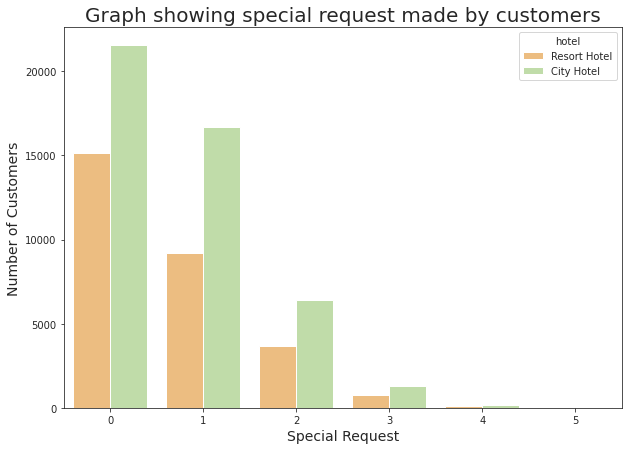

In [29]:
#Countplot for special request
sns.set_style('ticks')
plt.figure(figsize=(10,7))
sns.countplot(data = df2, x = 'total_of_special_requests', hue='hotel', palette="Spectral").set_title('Graph showing special request made by customers', fontsize =20)
plt.xlabel("Special Request", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

Conclusion: Most of the customers do not make any special request.

#10. Most preferred Room-Type


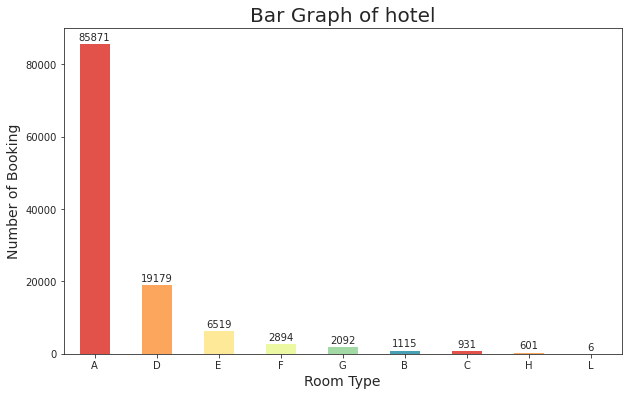

In [30]:
#Bar plot for number of customers and Room type
room_type = df['reserved_room_type'].value_counts()
plt.figure(figsize=(10, 6))
ax = room_type.plot(kind='bar', rot=0, color=sns.color_palette('Spectral'))
ax.set_title("Bar Graph of hotel", y = 1, fontsize=20)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Number of Booking', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

Conclusion: Most Preferred room type by customer is Room A.

11. What are the top 20 countries from where we are getting more customers?
12. What Deposit Type most customer choose?
13. From which market segment we are getting more number of Booking Cancellation?
14. From which market segment we are getting more customers who are not cancelling their booking?
15. Which Agent(id) is booking the most number of hotels?

#11.Top 20 Countries from where most number of customers are booking

Text(0, 0.5, 'Number of Customers')

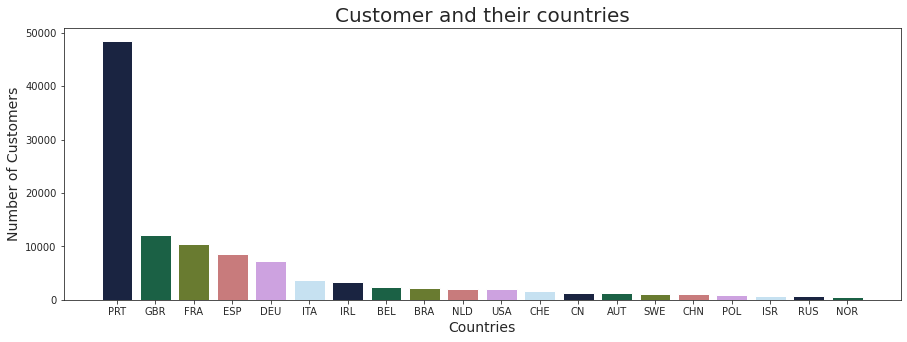

In [31]:
#barplot of customer and their origin countries
country = dict(df['country'].value_counts())
plt.figure(figsize=(15,5))
plt.bar((list(country.keys()))[:20],(list(country.values()))[:20] ,width=0.8, color=sns.color_palette('cubehelix'))
plt.title('Customer and their countries',fontsize = 20)
plt.xlabel('Countries' ,fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)

Concluson: Most of the customers are from PRT.

#12. Deposit Type

Text(0, 0.5, 'Number of Customers')

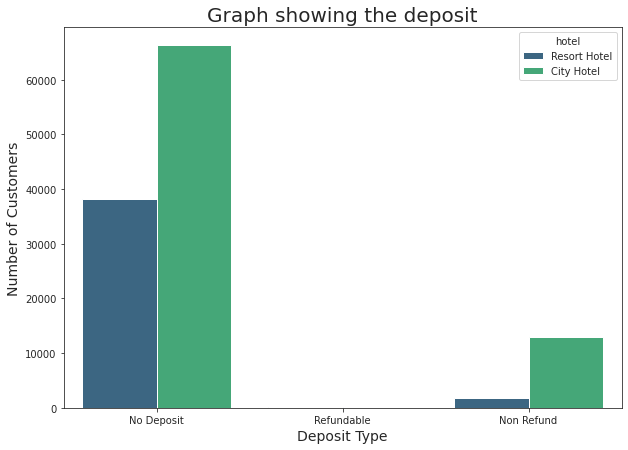

In [32]:
#Countplot for deposit
sns.set_style('ticks')
plt.figure(figsize=(10,7))
ax=sns.countplot(data = df, x = 'deposit_type',hue='hotel', palette="viridis").set_title('Graph showing the deposit', fontsize =20)
plt.xlabel("Deposit Type", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

Conclusion: Most of the customers prefer No Deposit for booking.

#13. Plot of cancelling booking from given market segment.

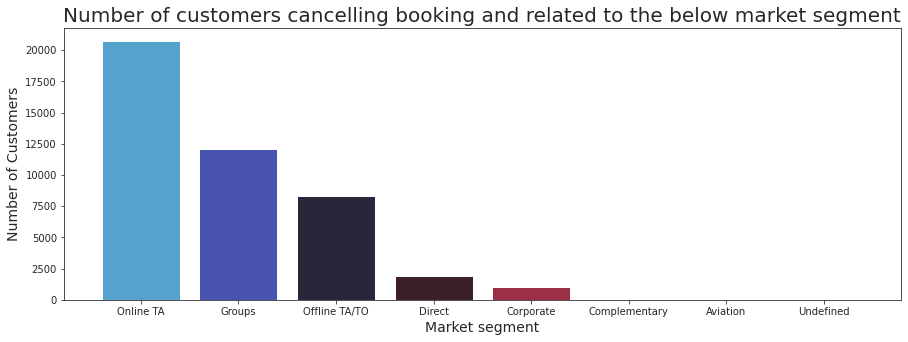

In [33]:
#barplot for cancelled booking and the market segment
counttt = dict(df1['market_segment'].value_counts())
aa=list(counttt.keys())
bb=list(counttt.values())
plt.figure(figsize = (15, 5))
plt.bar(aa,bb ,width=0.8, color=sns.color_palette('icefire'))
plt.title('Number of customers cancelling booking and related to the below market segment',fontsize = 20)
plt.xlabel('Market segment' ,fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)
plt.show()

Conclusion: Most of the customers from Online TA cancel their booking.

#14. Plot of not cancelling booking from given market segment.

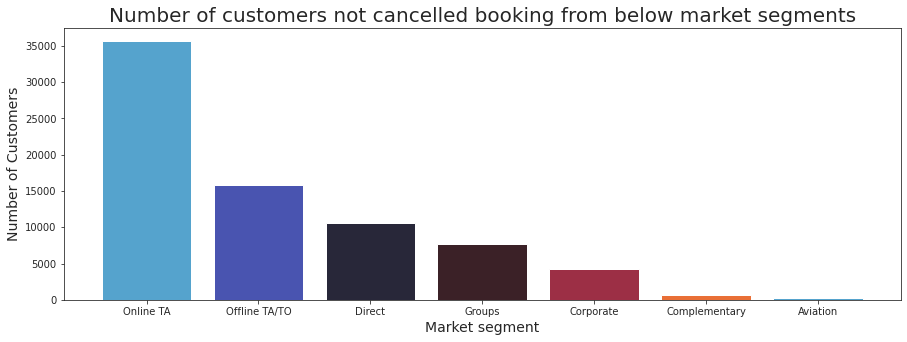

In [34]:
#barplot for booking not cancelled and the market segment
counttt = dict(df2['market_segment'].value_counts())
aa=list(counttt.keys())
bb=list(counttt.values())
plt.figure(figsize = (15, 5))
plt.bar(aa,bb ,width=0.8, color=sns.color_palette('icefire'))
plt.title('Number of customers not cancelled booking from below market segments',fontsize = 20)
plt.xlabel('Market segment' ,fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)
plt.show()

Conclusion: Most of the customer from Online TA are not Cancelling their bookings.

#15. Which Agent(id) is booking the most number of hotels

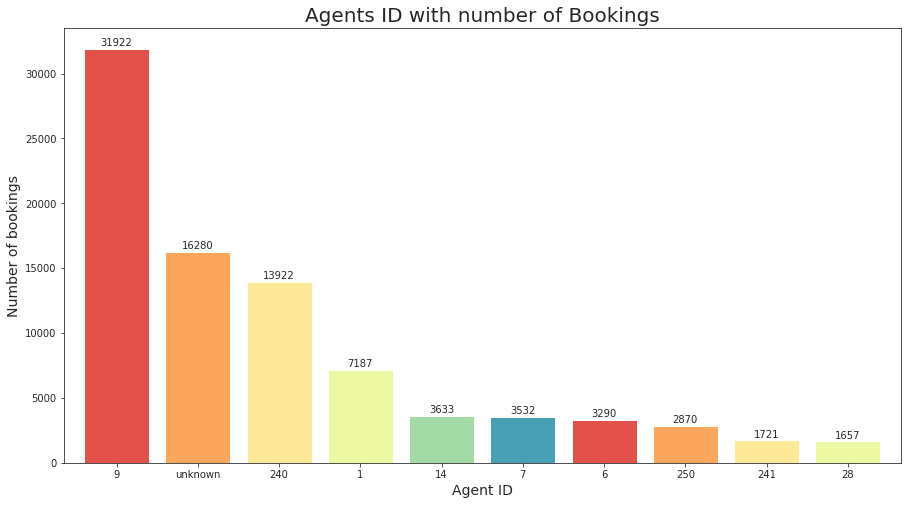

In [35]:
#barplot for agents and their bookings
agent = df['agent'].value_counts().head(10)
plt.figure(figsize=(15,8))
ax = agent.plot(kind='bar', rot=0, color=sns.color_palette('Spectral'), width=0.8)
ax.set_title("Agents ID with number of Bookings", y = 1, fontsize = 20)
ax.set_xlabel('Agent ID', fontsize = 14)
ax.set_ylabel('Number of bookings', fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

Conclusion: Agent with ID 9, books most number of hotels.

16. Which Room type has high average price?
17. In Which month most revenue are generated?
18. What is the optimal length to stay?
19. How many repeated guests we have?
20. Correlation between features.

#16. Room type and average price

Text(0, 0.5, 'Average Price')

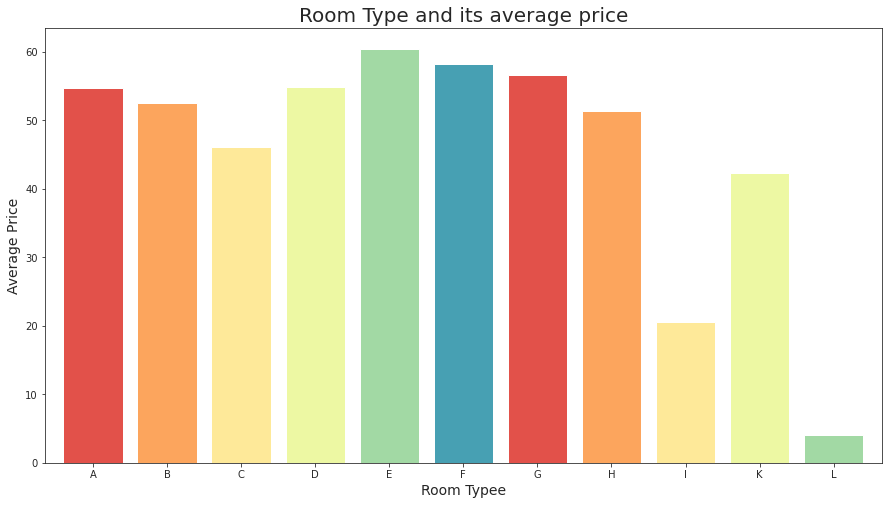

In [36]:
#barplot for Room type and their average price
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']+ df['babies'])
a=df.groupby('assigned_room_type')['adr_pp'].mean()
plt.figure(figsize=(15,8))
ax = a.plot(kind='bar', rot=0, color=sns.color_palette('Spectral'), width=0.8)
ax.set_title("Room Type and its average price", y = 1, fontsize = 20)
ax.set_xlabel('Room Typee', fontsize = 14)
ax.set_ylabel('Average Price', fontsize = 14)

Conclusion: The average price of Room E is the maximum and the average price of Room L is minimum.

#17.  Revenue per month per hotel

Text(0, 0.5, 'Total Revenue')

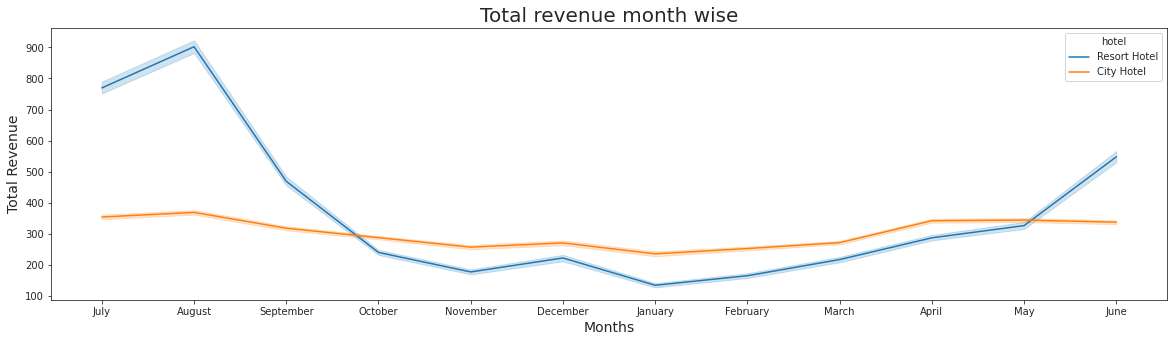

In [37]:
#lineplot for Revenue per hotel month-wise
plt.figure(figsize=(20,5))
df2['price'] = df2['adr'] * (df2['stays_in_weekend_nights'] + df2['stays_in_week_nights'])
sns.lineplot(data = df2, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.title('Total revenue month wise', fontsize=20)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Total Revenue',fontsize=14)

Conclusion: Revenue of Resort Hotel are maximum in the month of August and least in the month of January, and there is no high fluctuation in the price of city Hotels throughout the Year.

#18. Plotting Scatter plot to find the optimal length of stay

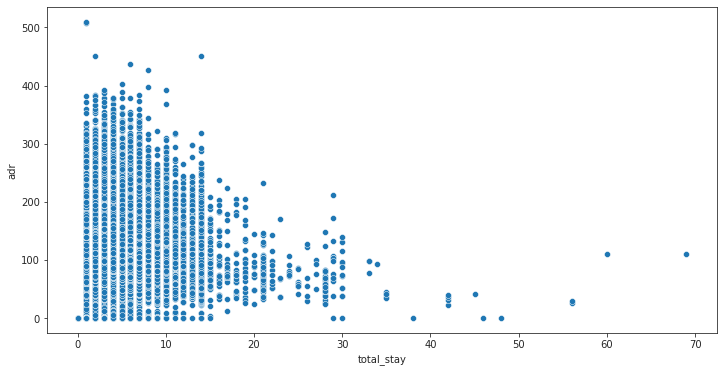

In [38]:
#scatterplot for optimal stay length
df['total_stay']=df['stays_in_week_nights']+df['stays_in_weekend_nights']
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.show()

**Conclusion:The longer the stay length, the best price customer will get.**

#19.Number of repeated guests

In [39]:
df2['is_repeated_guest'] = df2['is_repeated_guest'].apply(lambda x : 'New Guest' if x==0 else 'Repeated Guest')

Text(0, 0.5, 'Number of Guest')

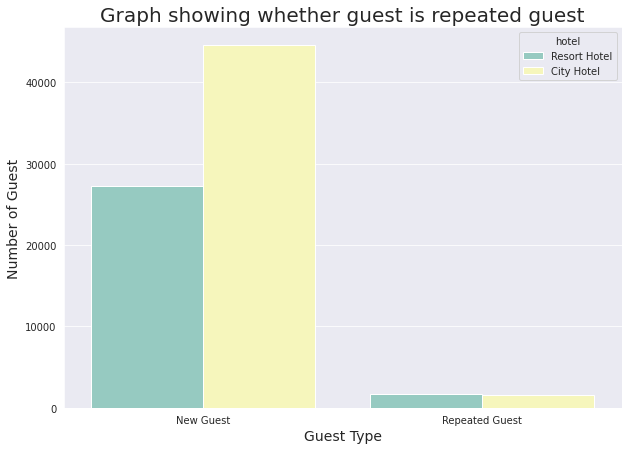

In [40]:
#countplot for guests [Repeated or New]
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
sns.countplot(data = df2, x = 'is_repeated_guest', hue='hotel', palette="Set3").set_title('Graph showing whether guest is repeated guest', fontsize =20)
plt.xlabel("Guest Type", fontsize=14)
plt.ylabel("Number of Guest", fontsize=14)

Conclusion: We have more number of New Guest in both type of hotels.

#20. Correlation between features

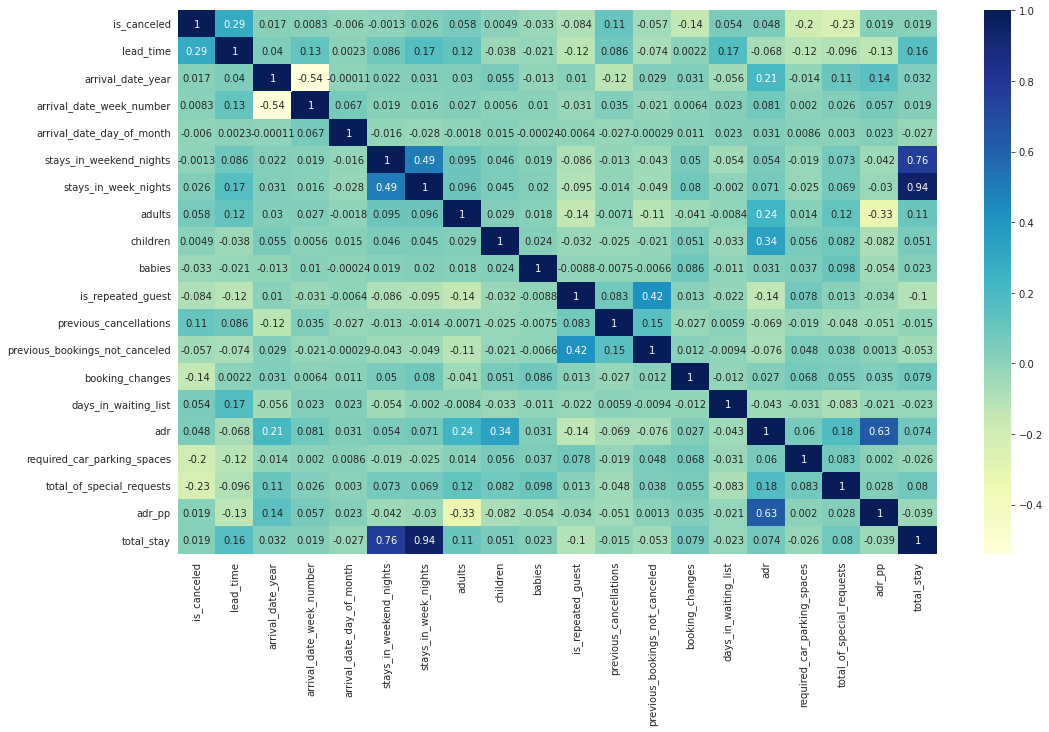

In [41]:
#Correlation
correlation = df.corr()
plt.figure(figsize=(17,10))
sns.heatmap(correlation, annot=True ,cmap="YlGnBu")

Conclusion: Total stay is highly correlated with stays_in_weekend_nighrs and stays_in_week_nights.